Predictions have been saved to 'predicted_diabetes_present_logistic.csv' using Logistic Regression.
Cross-validation scores (accuracy): [0.955 0.95  0.975 0.96  0.93 ]
Mean cross-validation score (accuracy): 0.954

Training Set Metrics:
Accuracy: 0.963
Precision: 0.9861809045226131
Recall: 0.967940813810111
F1-score: 0.9769757311761045


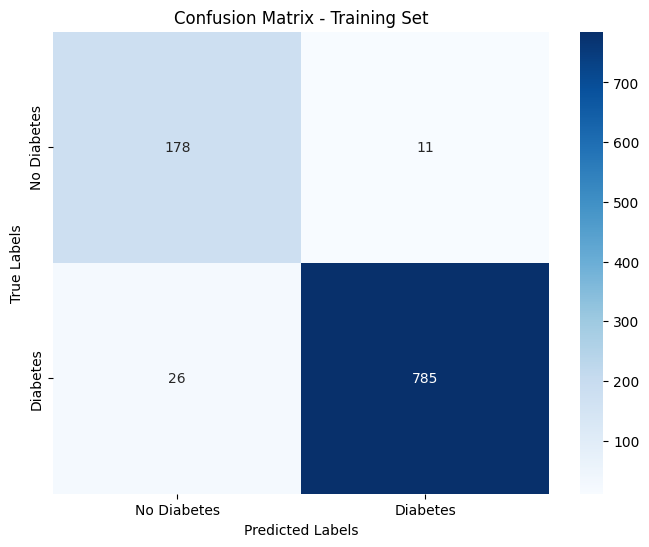

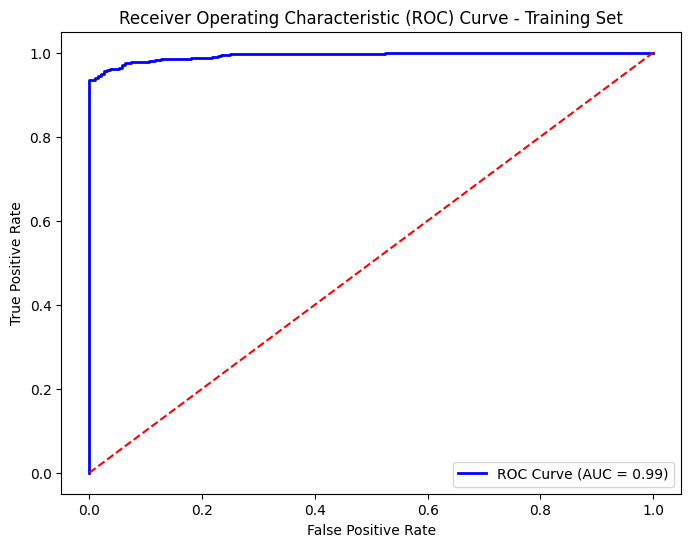

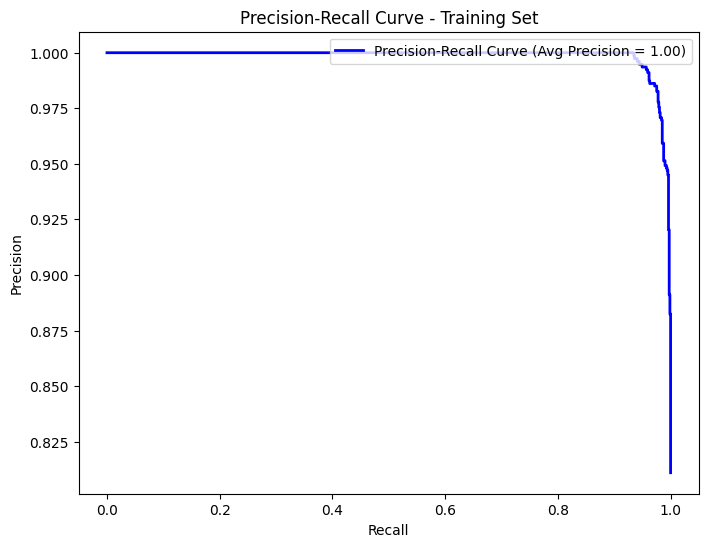

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
train_data = pd.read_csv('diabetes_dataset.csv')
test_data = pd.read_csv('diabetes_test_dataset.csv')

# Define features and target
features = [
    'Age', 'Gender', 'Body Mass Index', 'Blood Pressure', 'Cholesterol Level',
    'Family History of Diabetes', 'Smoking Status', 'Exercise Frequency',
    'Dietary Habits', 'Medical History', 'Medication Usage', 'Geographic Location'
]
target = 'Diabetes Diagnosis'

# Preprocess categorical features
categorical_features = [
    'Gender', 'Family History of Diabetes', 'Smoking Status', 'Exercise Frequency',
    'Dietary Habits', 'Medical History', 'Medication Usage', 'Geographic Location'
]

# Preprocess continuous features
continuous_features = ['Age', 'Body Mass Index', 'Blood Pressure', 'Cholesterol Level']

# Combine categorical and continuous preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),
        ('num', StandardScaler(), continuous_features)
    ])

# Fit preprocessor on training data and transform both training and test data
X_train = train_data[features].copy()
y_train = train_data[target]
X_test = test_data[features].copy()

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict using the test dataset
predictions = model.predict(X_test)

# Adding predictions to the test dataset
test_data['Predicted Diabetes Diagnosis'] = predictions

# Filter to only include records where diabetes is predicted (Predicted Diabetes Diagnosis == 1)
diabetes_present = test_data[test_data['Predicted Diabetes Diagnosis'] == 1]

# Save the filtered results
diabetes_present.to_csv('predicted_diabetes_present_logistic.csv', index=False)

print(f"Predictions have been saved to 'predicted_diabetes_present_logistic.csv' using Logistic Regression.")

# Cross-validation scores (accuracy)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores (accuracy):", cv_scores)
print("Mean cross-validation score (accuracy):", cv_scores.mean())

# Evaluate the model on training data
y_pred_train = model.predict(X_train)
print("\nTraining Set Metrics:")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train))
print("Recall:", recall_score(y_train, y_pred_train))
print("F1-score:", f1_score(y_train, y_pred_train))

# Visualizations
# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# ROC Curve
plt.figure(figsize=(8, 6))
y_pred_proba = model.predict_proba(X_train)[:, 1]
fpr, tpr, _ = roc_curve(y_train, y_pred_proba)
roc_auc = roc_auc_score(y_train, y_pred_proba)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Training Set')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
plt.figure(figsize=(8, 6))
precision, recall, _ = precision_recall_curve(y_train, y_pred_proba)
avg_precision = average_precision_score(y_train, y_pred_proba)
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall Curve (Avg Precision = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Training Set')
plt.legend(loc='upper right')
plt.show()
